<a href="https://colab.research.google.com/github/Sachira-Heshan/omic-data-and-machine-learning-in-the-identification-of-coronary-artery-disease/blob/main/results_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Research/Datasets/Cleaned/cleaned-dataset-GSE113079.xlsx')

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,131,132,133,134,135,136,137,138,139,140
0,GE_BrightCorner,2.157974,1.779174,1.476457,1.635460,1.459245,1.014671,1.548667,1.299535,1.340023,...,2.105669,3.494671,2.225658,2.244781,2.954112,4.258145,3.446817,3.219271,3.048190,3.601977
1,DarkCorner,-4.972070,-5.079564,-5.055798,-5.048396,-4.759264,-5.384547,-4.916507,-4.586820,-4.649654,...,-2.250812,-4.181840,-5.607463,-5.420901,-6.074095,-5.355829,-5.419512,-5.156093,-5.566904,-5.874120
2,p42318_v4,-5.136246,-5.309609,-4.683745,-5.058544,-5.044792,-5.042380,-5.147751,-4.501071,-4.903667,...,-2.410703,-4.110729,-5.811153,-5.480375,-6.194078,-4.979015,-5.532501,-5.517557,-5.754226,-6.050066
3,p117,-0.908056,-0.279806,-0.814316,-0.403859,-0.239435,-0.586996,-0.996306,-0.345914,-0.344358,...,-1.481907,-0.438192,-0.463400,-0.838711,-0.213053,-0.019725,-0.439010,-0.169885,-0.269132,-0.156173
4,p28737,-5.142836,-5.326123,-4.436602,-5.173800,-5.042362,-5.497274,-5.146853,-4.856003,-4.855644,...,-2.457831,-4.348550,-5.849335,-5.599132,-6.290147,-4.613355,-5.186365,-5.343323,-5.344678,-5.375709


In [ ]:
df = df.T
column_names = df.iloc[0, :]
df.columns = column_names.tolist()

In [ ]:
df.drop(index=["Unnamed: 0"], inplace=True)
# convert target value as integer
df["target_value"] = df["target_value"].astype(int)

In [ ]:
df.shape

(141, 65524)

In [ ]:
df.head()

,GE_BrightCorner,DarkCorner,p42318_v4,p117,p28737,p17314,A_33_P3310047,p22477,p8225,p7095,...,p25976,p23884,A_33_P3800496,A_21_P0006729,A_24_P284523,p11121,p26746,A_33_P3677559,p361,target_value
0,2.157974,-4.97207,-5.136246,-0.908056,-5.142836,-5.24106,0.996369,-3.309695,-1.096744,-2.356272,...,1.746663,-2.448382,-1.259322,-3.232127,3.164295,-0.41048,-3.946267,-3.01915,-1.535002,1
1,1.779174,-5.079564,-5.309609,-0.279806,-5.326123,-5.431599,1.049151,-2.68212,-0.88413,-3.141455,...,0.961229,-2.325115,-0.878489,-2.476317,3.059818,-0.499581,-4.027231,-3.49044,-1.432819,1
2,1.476457,-5.055798,-4.683745,-0.814316,-4.436602,-5.483527,1.107679,-3.565926,-1.364489,-3.778602,...,1.24937,-2.352775,-1.309131,-2.841979,2.908225,0.42274,-4.745641,-3.532535,-1.561514,1
3,1.63546,-5.048396,-5.058544,-0.403859,-5.1738,-5.315852,0.922813,-3.687033,-0.971812,-2.599749,...,1.431779,-3.219944,-1.369312,-2.633309,2.667611,0.74162,-4.544183,-4.334243,-1.536728,1
4,1.459245,-4.759264,-5.044792,-0.239435,-5.042362,-4.622399,0.786796,-3.605453,-0.992999,-3.243779,...,1.117545,-3.630248,-1.304075,-3.936828,2.64173,-0.62573,-4.912573,-4.216743,-1.963562,1


In [ ]:
# divide the features and target values
X = df.drop(columns=["target_value"])
y = df["target_value"]

X.shape

(141, 65523)

In [ ]:
# calculate the mutual information values for all 65524 features
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calculate Mutual Information between each feature and the target variable
mi_scores = mutual_info_classif(X, y, discrete_features=[False]*X.shape[1])

# Create a dictionary that maps feature names to their MI scores
feature_mi_scores = {feature_name: mi_score for feature_name, mi_score in zip(X.columns, mi_scores)}

# Sort the features in ascending order of their MI scores
sorted_features_ascending = sorted(feature_mi_scores.items(), key=lambda x: x[1])

# Select the worst 25 features
worst_features = [feature_name for feature_name, _ in sorted_features_ascending[:25]]

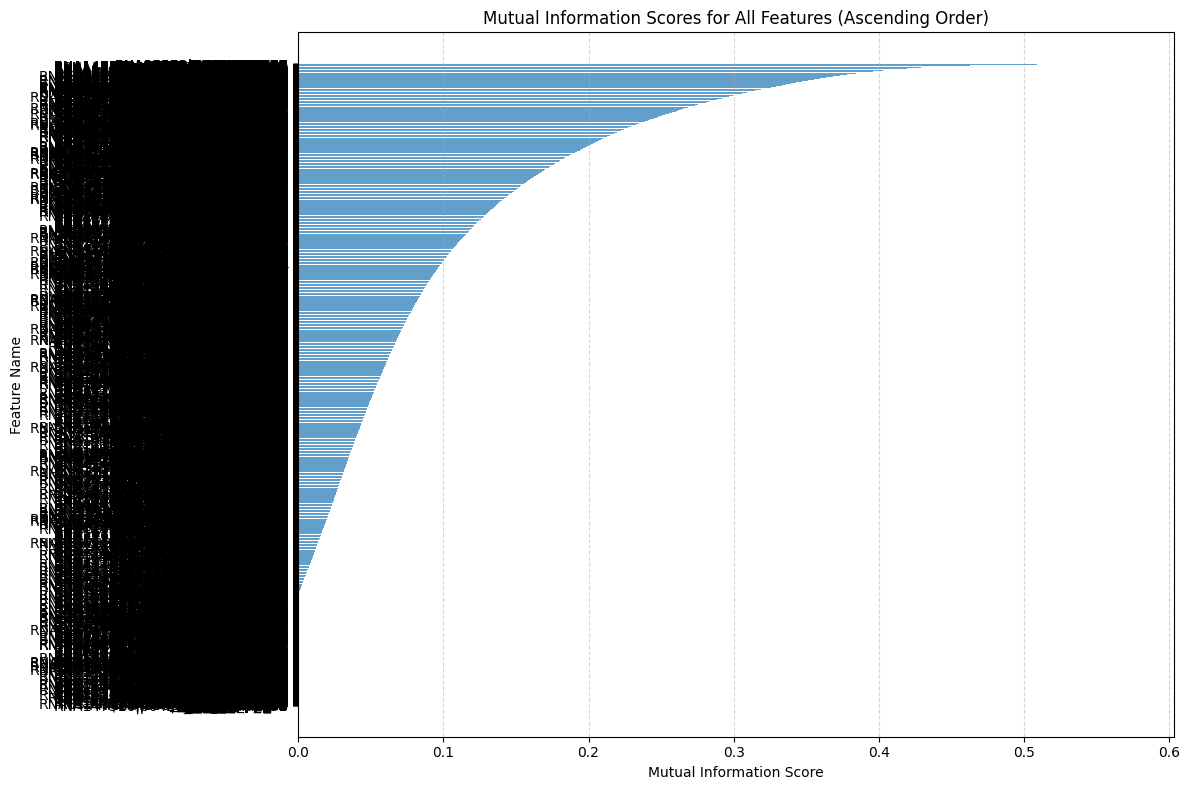

In [ ]:
# now let's try to plot these mutual information values
import matplotlib.pyplot as plt

# Extract the feature names and their MI scores from sorted_features_ascending
feature_names, mi_scores = zip(*sorted_features_ascending)

# Create a bar plot to visualize MI scores
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_names)), mi_scores, align='center', alpha=0.7)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature Name')
plt.title('Mutual Information Scores for All Features (Ascending Order)')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# research results

In [ ]:
# svm
svm_num_of_features = [125, 100, 75, 25, 15, 7, 3, 1]
svm_sensitivity = [100, 100, 100, 100, 100, 100, 100, 100]
svm_cv_mean_accuracy_k_5 = [92.216, 92.216, 92.216, 93.645, 93.645, 92.216, 92.216, 90.073]
svm_cv_std_k_5 = [2.596, 2.596, 2.596, 2.555, 2.555, 2.596, 2.596, 3.487]
svm_cv_mean_accuracy_k_8 = [92.851, 92.851, 92.851, 93.586, 94.321, 92.892, 92.851, 90.727]
svm_cv_std_k_8 = [3.850, 3.850, 3.850, 3.438, 4.048, 2.508, 2.667, 2.890]
svm_cv_mean_accuracy_k_10 = [92.904, 92.904, 92.904, 93.619, 94.333, 92.190, 93.619, 90.761]
svm_cv_std_k_10 = [7.144, 7.144, 7.144, 5.929, 5.334, 6.745, 4.995, 6.446]

In [ ]:
# rf
rf_num_of_features = [125, 100, 75, 25, 15, 7, 3, 1]
rf_sensitivity = [100, 100, 100, 100, 100, 100, 100, 100]
rf_cv_mean_accuracy_k_5 = [93.645, 92.931, 95.074, 96.502, 95.788, 95.788, 96.502, 95.025]
rf_cv_std_k_5 = [4.091, 3.114, 3.527, 3.778, 3.364, 4.052, 4.402, 2.87]
rf_cv_mean_accuracy_k_8 = [94.322, 94.281, 93.587, 95.752, 95.016, 95.752, 98.57, 93.505]
rf_cv_std_k_8 = [4.049, 4.049, 3.439, 4.733, 4.465, 3.708, 2.478, 6.137]
rf_cv_mean_accuracy_k_10 = [94.333, 94.333, 94.333, 95.048, 95.048, 96.476, 97.857, 93.619]
rf_cv_std_k_10 = [6.218, 6.218, 6.218, 5.562, 4.554, 4.758, 3.273, 7.454]

In [ ]:
# svm cross validation values
svm_accuracies_k_5_f_15 = [89.655, 96.428, 92.857, 96.428, 92.857]
svm_accuracies_k_8_f_15 = [94.444, 88.888, 94.444, 100.0, 94.444, 100.0, 94.117, 88.235]
svm_accuracies_k_10_f_15 = [93.333, 85.714, 100.0, 92.857, 100.0, 92.857, 100.0, 92.857, 100.0, 85.714]

In [ ]:
# rf cross validation values
rf_accuracies_k_5_f_3 = [89.655, 100.0, 100.0, 92.857, 100.0]
rf_accuracies_k_8_f_3 = [100.0, 94.444, 100.0, 100.0, 100.0, 100.0, 94.117, 100.0]
rf_accuracies_k_10_f_3 = [100.0, 92.857, 100.0, 100.0, 100.0, 100.0, 100.0, 92.857, 92.857, 100.0]

In [ ]:
# best accuracies of different machine learning algorithms
# svm, random forest, logistic regression, decision tree
# 15, 3, 100, 100
best_accuracies = [94.321, 98.57, 95.711, 95.762]

In [ ]:
# accuracies comparison of different machine learning algorithms same num of features and k = 10
# svm, random forest, logistic regression, decision tree
# 100
best_accuracies = [92.904, 94.333, 95.714, 95.762]

<ipython-input-10-f3a69e3a0540>:35: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(feature_subset_sizes, cross_val_accuracies, yerr=cross_val_stds, fmt='o', marker='o')


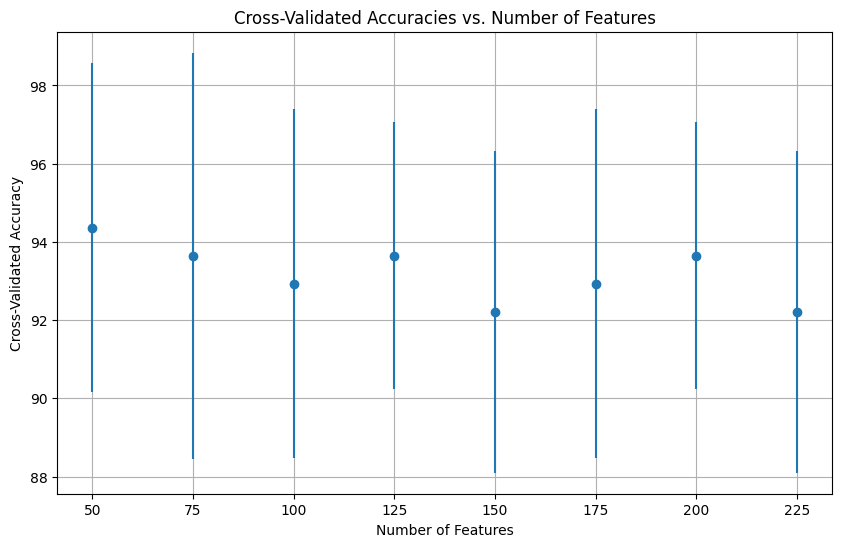

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your classifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Create a range of feature subset sizes (e.g., 1 to 125 features)
feature_subset_sizes = [50,75,100,125,150,175,200,225]

# Create an array to store the cross-validated accuracies
cross_val_accuracies = []
cross_val_stds = []

# Specify your classifier (e.g., RandomForestClassifier) and any other relevant settings
classifier = RandomForestClassifier()

# Perform cross-validation for different feature subset sizes
for k in feature_subset_sizes:
    # Select the top k features using mutual information
    mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
    X_k = mi_selector.fit_transform(X, y)

    # Perform cross-validation to estimate the accuracy
    accuracies = cross_val_score(classifier, X_k, y, cv=5)  # Adjust the number of folds (cv) as needed
    #mean_accuracy = np.mean(accuracies)

    mean_accuracy = round(accuracies.mean()*100, 3) #print(f"Mean Accuracy: {round(scores.mean()*100, 3)}%")
    std_accuracy = round(accuracies.std()*100, 3) #print(f"Standard Deviation: {round(scores.std()*100, 3)}%")

    cross_val_accuracies.append(mean_accuracy)
    cross_val_stds.append(std_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(feature_subset_sizes, cross_val_accuracies, yerr=cross_val_stds, fmt='o', marker='o')
# plt.boxplot(cross_val_accuracies, labels=[str(k) for k in feature_subset_sizes], vert=False, sym='b+')
plt.title('Cross-Validated Accuracies vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()